In [39]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

num_of_iter=2000
eta=0.1 # Learning rate
x_u_list = np.array([[0,0],[0,1],[1,0],[1,1]]) 
y_u_list = np.array([[1],[-1],[-1],[1]])
input_dim, number_of_neuron_hidden_layer, number_of_output = 2,2,1

def g_function(x):
    """Activation function

    Function:
            g(h) = tanh (beta * h)
    with beta = 1
            g'(g)= beta * (1-g ^2 )

    Args:
        x (float): input value

    Returns:
        float: output value
    """
    return np.tanh(x)

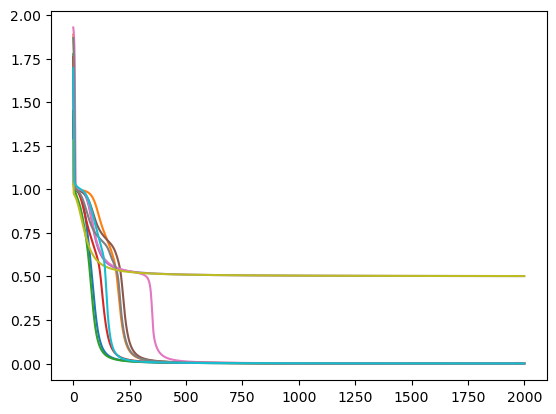

In [20]:
number_of_trials = 10 # Number of time we want to run the training process with different initial conditions
error = np.zeros([ number_of_trials , num_of_iter])

for idx_num_of_trial in range(number_of_trials):
    # 1. Initialize the weights to small random values. (layer 1)
    layer1_wjk = np.random.uniform(size=(number_of_neuron_hidden_layer,input_dim)) 
    layer1_bias = np.random.uniform(size=(1,number_of_neuron_hidden_layer))

    # 1. Initialize the weights to small random values. (layer 2)
    layer2_wij = np.random.uniform(size=(number_of_output,number_of_neuron_hidden_layer)) 
    layer2_bias = np.random.uniform(size=(1,number_of_output))

    for i in range(num_of_iter):
        layer1_hj = np.dot(x_u_list,layer1_wjk.T)  #Activation h_j= x*w_jk
        layer1_hj += layer1_bias           #Bias

        # Propagate the signal forwards through the network
        layer1_Vj = g_function(layer1_hj)       #Activation function g(x) applied to h_jk. Output in the layer1

        layer2_hi = np.dot(layer1_Vj,layer2_wij.T)
        layer2_hi += layer2_bias
        layer2_Vi = g_function(layer2_hi) #Activation function g(x) applied to h_ij. Output in the layer 2. Output layer

        # Compute the delta for the output layer
        layer2_delta_i = (1-layer2_Vi**2) * (y_u_list-layer2_Vi) # g'(h_i) * (y_i - V_i)
        
        layer2_delta_bias = eta*np.sum(layer2_delta_i,0)

        # Compute the delta for the hidden layer
        layer1_delta_j = (1-layer1_Vj**2)*(layer2_delta_i.dot(layer2_wij))  # g'(h_j) * sum_i(delta_i * w_ij)
        layer1_delta_bias = eta*np.sum(layer1_delta_j,0)

        # 6. Compute the gradient of the error with respect to the weights
        layer2_delta_Wij = eta*layer2_delta_i.T.dot(layer1_Vj)
        layer1_delta_wjk = eta*(layer1_delta_j.T).dot(x_u_list)
        
        # 6.1 Update the weights
        layer1_wjk += layer1_delta_wjk
        layer1_bias += layer1_delta_bias
        layer2_wij += layer2_delta_Wij
        layer2_bias += layer2_delta_bias

        # 7. Compute the error
        error[idx_num_of_trial,i] = np.sum((y_u_list-layer2_Vi)**2)/4
        
# fig =plt.subplots(figsize=(15,5))
# plt.plot(sum(error,1))

for i_idx in range(number_of_trials):
   plt.plot(error[i_idx,:])
plt.show()

### Parte B

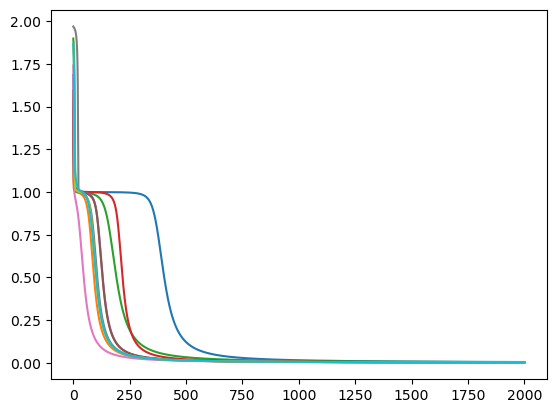

In [19]:
number_of_trials = 10
num_of_iterations=2000
error_model_2 = np.zeros([number_of_trials,num_of_iterations])
for i_idx in range(number_of_trials):
    layer1_wjk = np.random.uniform(size=(1,2))
    layer1_bias = np.random.uniform(size=(1,1))

    layer2_Wij = np.random.uniform(size=(1,3)) # The first two are for the input layer and the last one is for the hidden layer
    layer2_bias = np.random.uniform(size=(1,1))

    for i in range(num_of_iterations):
        layer1_hj = np.dot(x_u_list,layer1_wjk.T)            #Aca hago la suma de los wijx
        layer1_hj += layer1_bias                        # Assumed that bias = 1 * wjk  
        layer1_Vj = g_function(layer1_hj)       

        layer2_hi = np.dot( np.concatenate( [x_u_list, layer1_Vj],axis=1) ,layer2_Wij.T) # The input is the concatenation of the input and the hidden layer
        layer2_hi += layer2_bias
        layer2_Oi = g_function(layer2_hi)

        # 4. Compute the delta for the output layer
        layer2_delta_i = (1-layer2_Oi**2) * (y_u_list-layer2_Oi) # g'(h_i) * (y_i - V_i)
        layer2_delta_bias = eta*np.sum(layer2_delta_i,0)

        # 5 Compute the delta for the hidden layers
        layer1_delta_j = (1-layer1_Vj**2)*(layer2_delta_i.dot(layer2_Wij[0,2])) # g'(h_j) * sum_i(delta_i * w_ij)
        layer1_delta_bias = eta*np.sum(layer1_delta_j,0)

        # 6. Compute the gradient of the error with respect to the weights
        layer2_delta_Wij = eta*layer2_delta_i.T.dot(np.concatenate([x_u_list, layer1_Vj],axis=1))
        layer1_delta_wjk = eta*(layer1_delta_j.T).dot(x_u_list)

        # 6.1 Update the weights
        layer1_wjk += layer1_delta_wjk
        layer1_bias += layer1_delta_bias
        layer2_Wij += layer2_delta_Wij
        layer2_bias += layer2_delta_bias

        # 7. Compute the error
        error_model_2[i_idx,i] = np.sum((y_u_list-layer2_Oi)**2)/4
        
# fig =plt.subplots(figsize=(15,5))
# plt.plot(sum(error_model_2,0))


for i_idx in range(number_of_trials):
   plt.plot(error_model_2[i_idx,:])
plt.show()

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

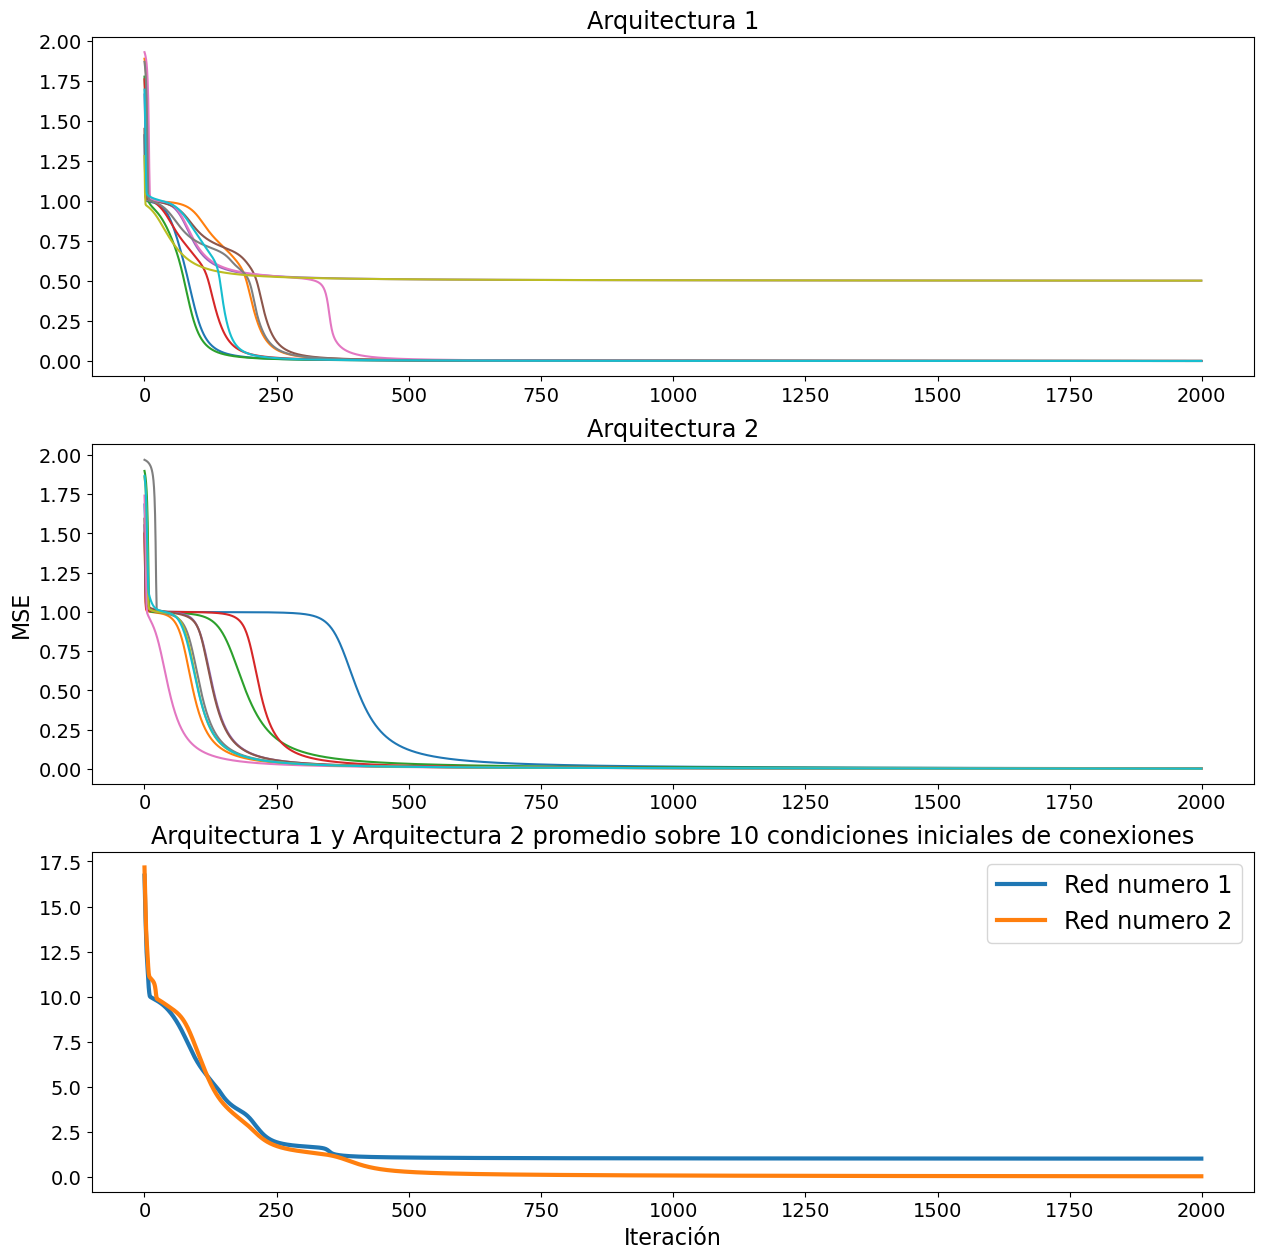

In [38]:

fig , axes =plt.subplots(figsize=(15,15))
axes.axis('off')

plt.subplot(311)
plt.title('Arquitectura 1',fontsize='xx-large')

for i_idx in range(number_of_trials):
    plt.plot(error[i_idx,:])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(312)
plt.title('Arquitectura 2',fontsize='xx-large')

for i_idx in range(number_of_trials):
    plt.plot(error_model_2[i_idx,:])
plt.ylabel('MSE',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(313)
plt.title('Arquitectura 1 y Arquitectura 2. Promedio sobre 10 condiciones iniciales de conexiones',fontsize='xx-large')
plt.plot(sum(error,0),linewidth=3)
plt.plot(sum(error_model_2,0),linewidth=3)
plt.legend(['Red numero 1','Red numero 2'],fontsize='xx-large')
plt.xlabel('Iteración',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


## Problema 2


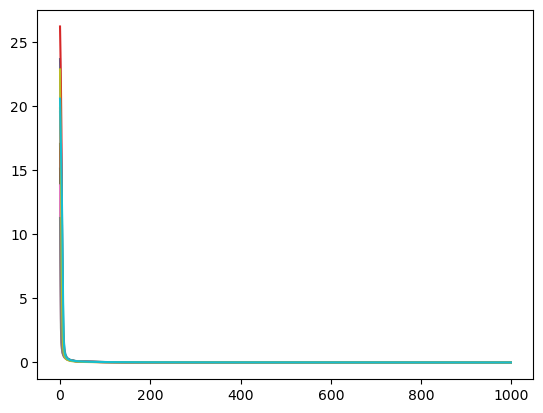

In [58]:
num_of_iter = 1000
eta = 0.01 # Learning rate  
N = 5 # Number of model input 

# Sample data
# Generate all possible combinations of N inputs, each input being either +1 or -1
x_u_list = list(itertools.product([1, -1], repeat=N))

for x_sample in x_u_list:
        # The output y is +1 if the product of inputs is +1, otherwise -1
        y_u_list = 1 if all(x_i == 1 for x_i in x_sample) else -1 if all(x_i == -1 for x_i in x_sample) else -1 #


# Model
input_dim = N
number_of_neuron_hidden_layer = 2
number_of_output = 1

neuron_counts = [1, 3, 5, 7, 9, 11]  # Neuron counts for hidden layer

number_of_trials = 10 # Number of time we want to run the training process with different initial conditions
error = np.zeros([ number_of_trials , num_of_iter])


for idx_num_of_trial in range(number_of_trials):
    # 1. Initialize the weights to small random values. (layer 1)
    layer1_wjk = np.random.uniform(size=(number_of_neuron_hidden_layer,input_dim)) 
    layer1_bias = np.random.uniform(size=(1,number_of_neuron_hidden_layer))

    # 1. Initialize the weights to small random values. (layer 2)
    layer2_wij = np.random.uniform(size=(number_of_output,number_of_neuron_hidden_layer)) 
    layer2_bias = np.random.uniform(size=(1,number_of_output))

    for i in range(num_of_iter):
        layer1_hj = np.dot(x_u_list,layer1_wjk.T)  #Activation h_j= x*w_jk
        layer1_hj += layer1_bias           #Bias

        # Propagate the signal forwards through the network
        layer1_Vj = g_function(layer1_hj)       #Activation function g(x) applied to h_jk. Output in the layer1

        layer2_hi = np.dot(layer1_Vj,layer2_wij.T)
        layer2_hi += layer2_bias
        layer2_Vi = g_function(layer2_hi) #Activation function g(x) applied to h_ij. Output in the layer 2. Output layer

        # Compute the delta for the output layer
        layer2_delta_i = (1-layer2_Vi**2) * (y_u_list-layer2_Vi) # g'(h_i) * (y_i - V_i)
        
        layer2_delta_bias = eta*np.sum(layer2_delta_i,0)

        # Compute the delta for the hidden layer
        layer1_delta_j = (1-layer1_Vj**2)*(layer2_delta_i.dot(layer2_wij))  # g'(h_j) * sum_i(delta_i * w_ij)
        layer1_delta_bias = eta*np.sum(layer1_delta_j,0)

        # 6. Compute the gradient of the error with respect to the weights
        layer2_delta_Wij = eta*layer2_delta_i.T.dot(layer1_Vj)
        layer1_delta_wjk = eta*(layer1_delta_j.T).dot(x_u_list)
        
        # 6.1 Update the weights
        layer1_wjk += layer1_delta_wjk
        layer1_bias += layer1_delta_bias
        layer2_wij += layer2_delta_Wij
        layer2_bias += layer2_delta_bias

        # 7. Compute the error
        error[idx_num_of_trial,i] = np.sum((y_u_list-layer2_Vi)**2)/4
        
# fig =plt.subplots(figsize=(15,5))
# plt.plot(sum(error,1))

for i_idx in range(number_of_trials):
   plt.plot(error[i_idx,:])
plt.show()

For multiple number of neurons in the hidden layer

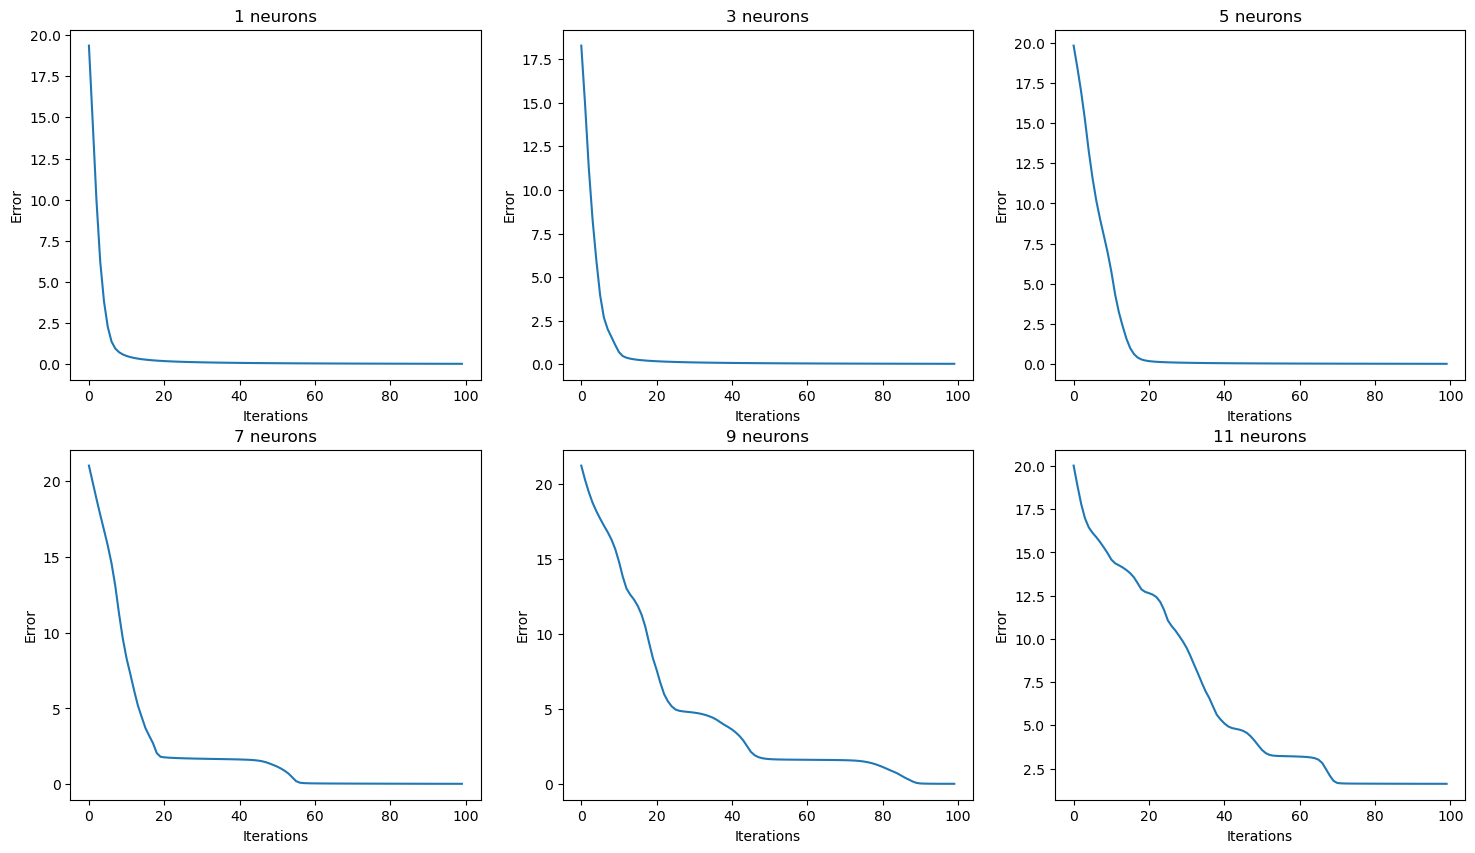

In [57]:
num_of_iter = 100
eta = 0.01 # Learning rate  
N = 5 # Number of model input 

# Sample data
# Generate all possible combinations of N inputs, each input being either +1 or -1
x_u_list = list(itertools.product([1, -1], repeat=N))

for x_sample in x_u_list:
        # The output y is +1 if the product of inputs is +1, otherwise -1
        y_u_list = 1 if all(x_i == 1 for x_i in x_sample) else -1 if all(x_i == -1 for x_i in x_sample) else -1 #


# Model
input_dim = N
number_of_neuron_hidden_layer = 11
number_of_output = 1

neuron_counts = [1, 3, 5, 7, 9, 11]  # Neuron counts for hidden layer

number_of_trials = 10 # Number of time we want to run the training process with different initial conditions
error = np.zeros([ number_of_trials , num_of_iter])

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Flatten axes for easy indexing

# Loop over different numbers of neurons in the hidden layer
for idx, number_of_neuron_hidden_layer in enumerate(neuron_counts):

    for idx_num_of_trial in range(number_of_trials):
        # 1. Initialize the weights to small random values. (layer 1)
        layer1_wjk = np.random.uniform(size=(number_of_neuron_hidden_layer,input_dim)) 
        layer1_bias = np.random.uniform(size=(1,number_of_neuron_hidden_layer))

        # 1. Initialize the weights to small random values. (layer 2)
        layer2_wij = np.random.uniform(size=(number_of_output,number_of_neuron_hidden_layer)) 
        layer2_bias = np.random.uniform(size=(1,number_of_output))

        for i in range(num_of_iter):
            layer1_hj = np.dot(x_u_list,layer1_wjk.T)  #Activation h_j= x*w_jk
            layer1_hj += layer1_bias           #Bias

            # Propagate the signal forwards through the network
            layer1_Vj = g_function(layer1_hj)       #Activation function g(x) applied to h_jk. Output in the layer1

            layer2_hi = np.dot(layer1_Vj,layer2_wij.T)
            layer2_hi += layer2_bias
            layer2_Vi = g_function(layer2_hi) #Activation function g(x) applied to h_ij. Output in the layer 2. Output layer

            # Compute the delta for the output layer
            layer2_delta_i = (1-layer2_Vi**2) * (y_u_list-layer2_Vi) # g'(h_i) * (y_i - V_i)
            
            layer2_delta_bias = eta*np.sum(layer2_delta_i,0)

            # Compute the delta for the hidden layer
            layer1_delta_j = (1-layer1_Vj**2)*(layer2_delta_i.dot(layer2_wij))  # g'(h_j) * sum_i(delta_i * w_ij)
            layer1_delta_bias = eta*np.sum(layer1_delta_j,0)

            # 6. Compute the gradient of the error with respect to the weights
            layer2_delta_Wij = eta*layer2_delta_i.T.dot(layer1_Vj)
            layer1_delta_wjk = eta*(layer1_delta_j.T).dot(x_u_list)
            
            # 6.1 Update the weights
            layer1_wjk += layer1_delta_wjk
            layer1_bias += layer1_delta_bias
            layer2_wij += layer2_delta_Wij
            layer2_bias += layer2_delta_bias

            # 7. Compute the error
            error[idx_num_of_trial,i] = np.sum((y_u_list-layer2_Vi)**2)/4
            


# Plot the average error over all trials for this number of neurons
    avg_error = np.mean(error, axis=0)
    ax = axes[idx]
    ax.plot(avg_error)
    ax.set_title(f"{number_of_neuron_hidden_layer} neurons")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Error")

plt.show()

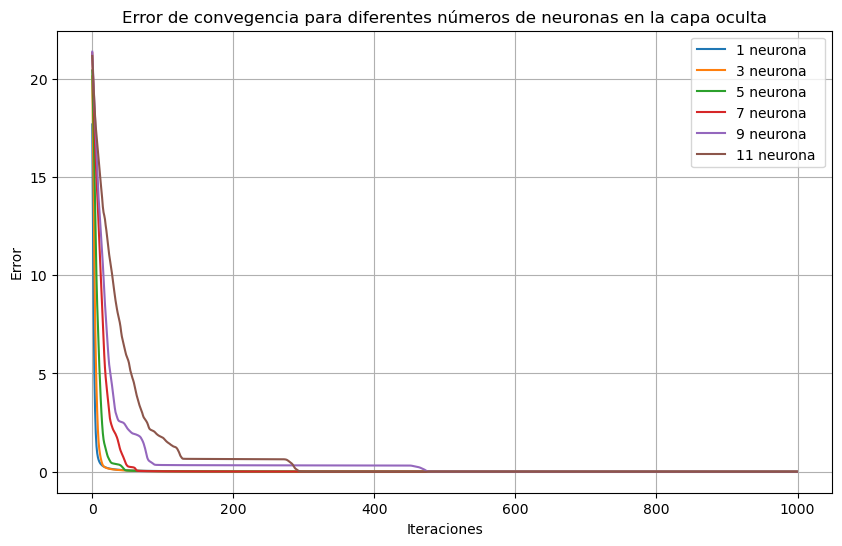

In [65]:
num_of_iter = 1000
eta = 0.01 # Learning rate  
N = 5 # Number of model input 

# Sample data
# Generate all possible combinations of N inputs, each input being either +1 or -1
x_u_list = list(itertools.product([1, -1], repeat=N))

for x_sample in x_u_list:
        # The output y is +1 if the product of inputs is +1, otherwise -1
        y_u_list = 1 if all(x_i == 1 for x_i in x_sample) else -1 if all(x_i == -1 for x_i in x_sample) else -1 #


# Model
input_dim = N
number_of_neuron_hidden_layer = 11
number_of_output = 1

neuron_counts = [1, 3, 5, 7, 9, 11]  # Neuron counts for hidden layer

number_of_trials = 50 # Number of time we want to run the training process with different initial conditions
error = np.zeros([ number_of_trials , num_of_iter])

# Set up the plot
plt.figure(figsize=(10, 6))

# Loop over different numbers of neurons in the hidden layer
for idx, number_of_neuron_hidden_layer in enumerate(neuron_counts):

    for idx_num_of_trial in range(number_of_trials):
        # 1. Initialize the weights to small random values. (layer 1)
        layer1_wjk = np.random.uniform(size=(number_of_neuron_hidden_layer,input_dim)) 
        layer1_bias = np.random.uniform(size=(1,number_of_neuron_hidden_layer))

        # 1. Initialize the weights to small random values. (layer 2)
        layer2_wij = np.random.uniform(size=(number_of_output,number_of_neuron_hidden_layer)) 
        layer2_bias = np.random.uniform(size=(1,number_of_output))

        for i in range(num_of_iter):
            layer1_hj = np.dot(x_u_list,layer1_wjk.T)  #Activation h_j= x*w_jk
            layer1_hj += layer1_bias           #Bias

            # Propagate the signal forwards through the network
            layer1_Vj = g_function(layer1_hj)       #Activation function g(x) applied to h_jk. Output in the layer1

            layer2_hi = np.dot(layer1_Vj,layer2_wij.T)
            layer2_hi += layer2_bias
            layer2_Vi = g_function(layer2_hi) #Activation function g(x) applied to h_ij. Output in the layer 2. Output layer

            # Compute the delta for the output layer
            layer2_delta_i = (1-layer2_Vi**2) * (y_u_list-layer2_Vi) # g'(h_i) * (y_i - V_i)
            
            layer2_delta_bias = eta*np.sum(layer2_delta_i,0)

            # Compute the delta for the hidden layer
            layer1_delta_j = (1-layer1_Vj**2)*(layer2_delta_i.dot(layer2_wij))  # g'(h_j) * sum_i(delta_i * w_ij)
            layer1_delta_bias = eta*np.sum(layer1_delta_j,0)

            # 6. Compute the gradient of the error with respect to the weights
            layer2_delta_Wij = eta*layer2_delta_i.T.dot(layer1_Vj)
            layer1_delta_wjk = eta*(layer1_delta_j.T).dot(x_u_list)
            
            # 6.1 Update the weights
            layer1_wjk += layer1_delta_wjk
            layer1_bias += layer1_delta_bias
            layer2_wij += layer2_delta_Wij
            layer2_bias += layer2_delta_bias

            # 7. Compute the error
            error[idx_num_of_trial,i] = np.sum((y_u_list-layer2_Vi)**2)/4
            


    # Plot the average error over all trials for this number of neurons
    avg_error = np.mean(error, axis=0)
    plt.plot(avg_error, label=f'{number_of_neuron_hidden_layer} neurona ')

# Add labels and legend to the plot
plt.title("Error de convegencia para diferentes números de neuronas en la capa oculta")
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()